In [53]:
from pandas import read_csv, concat
from pandas import Series
from numpy import array
from numpy import arange, asarray
from matplotlib import pyplot
import itertools

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from numpy import mean
from numpy import std
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample

In [54]:
def detrend(lists): 
    newL = list()
    for i in range(lists.count()):
        if(i == 0):
            continue
        else: 
            newL.append(lists[i]-lists[i-1])
    newA = array(newL)
    return newA

In [55]:
def createData(lis):
    transform = list()
    for index, row in lis.iterrows():
        transform.append(detrend(row))
        #transform.append(row)
    return transform

In [56]:
df = read_csv('mitbih_train.csv', header = None)
dfTest = read_csv('mitbih_test.csv', header = None)

In [57]:
distribution = df[187].value_counts()

Create visualization

<BarContainer object of 5 artists>

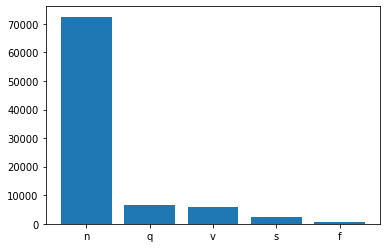

In [58]:
name = ['n','q','v','s','f']
pyplot.bar(name,distribution)

Distribution is heavily disproportionate

In [59]:
df0 = df[df[187]==0].sample(10000, random_state = 100)
df1 = df[df[187]==1]
df2 = df[df[187]==2]
df3 = df[df[187]==3]
df4 = df[df[187]==4]
df1OS = resample(df1, replace = True, n_samples = 10000, random_state = 110)
df2OS = resample(df2, replace = True, n_samples = 10000, random_state = 120)
df3OS = resample(df3, replace = True, n_samples = 10000, random_state = 130)
df4OS = resample(df4, replace = True, n_samples = 10000, random_state = 140)

In [60]:
df0.shape

(10000, 188)

In [61]:
dfTotal = concat([df0,df1OS,df2OS,df3OS,df4OS])

In [62]:
from pandas import DataFrame
x = dfTotal.values
dfTotal = DataFrame(x)

Shuffling Data

In [63]:
dfTotal[187].value_counts()

3.0    10000
4.0    10000
2.0    10000
1.0    10000
0.0    10000
Name: 187, dtype: int64

In [64]:
dfTotal=dfTotal.sample(frac = 1)
dfTotal.shape

(50000, 188)

Now data is now same size

<BarContainer object of 5 artists>

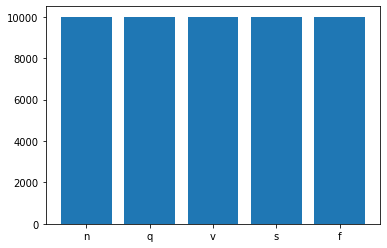

In [65]:
distribution = dfTotal[187].value_counts()
pyplot.bar(name,distribution)

Splitting data for train and testing

In [66]:
# trainX = dfTotal.iloc[:,dfTotal.columns!=187]
# trainX = createData(trainX)
# trainY = dfTotal.iloc[:,dfTotal.columns==187]
trainX = dfTotal.iloc[:,dfTotal.columns!=187]
trainY = dfTotal.iloc[:,dfTotal.columns==187]


In [67]:
testX = dfTest.iloc[:,dfTest.columns != 187]
#testX = createData(testX)
testY = dfTest.iloc[:,dfTest.columns == 187]

In [138]:
# pyplot.plot(trainX[0])
# pyplot.show()
# pyplot.plot(trainX[5002])
# pyplot.show()
# pyplot.plot(trainX[10010])
# pyplot.show()
# pyplot.plot(trainX[15300])
# pyplot.show()
# pyplot.plot(trainX[24999])
# pyplot.show()

In [ ]:
asarray(trainY)[0]

KNN 92.792% +/-0.462
RF 97.760% +/-0.269
SVM 90.556% +/-0.437


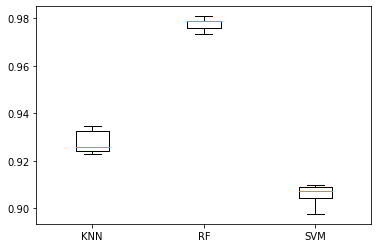

In [32]:
models = list()
names = list()
models.append(KNeighborsClassifier())
names.append("KNN")
models.append(RandomForestClassifier())
names.append("RF")
models.append(SVC())
names.append('SVM')
allscores = list()
for i in range(len(models)):
    s = StandardScaler()
    p = Pipeline(steps=[('s',s), ('m' , models[i])])
    scores = cross_val_score(p, trainX, trainY, scoring='accuracy', cv=5, n_jobs=-1)
    allscores.append(scores)
    m,s = mean(scores)*100, std(scores)*100
    print('%s %.3f%% +/-%.3f' % (names[i], m, s))
pyplot.boxplot(allscores,labels = names)
pyplot.show()

In [2]:
# evaluate models
all_scores = list()
for i in range(len(models)):
	# create a pipeline for the model
	scaler = StandardScaler()
	model = Pipeline(steps=[('s',scaler), ('m',models[i])])
	# fit
	# model = models[i]
# 	model.fit(sequencesTrain, targetTrain)
# 	# predict
# 	yhat = model.predict(sequences1)
# 	# evaluate
# 	score = f1_score(target1, yhat, average = 'macro') * 100
    #score = accuracy_score(target1,yhat)*100
    
	model.fit(trainX, trainY) #Swapped the training and testing, resulted in better f1 score but take note 
    #more data trained is usually better
	# predict
	yhat = model.predict(testX)
	# evaluate
	score = f1_score(testY, yhat, average = 'macro') * 100
	print(confusion_matrix(testY, yhat))

    
	all_scores.append(score)
	# summarize
	print('%s %.3f%%' % (names[i], score))
# plot
pyplot.bar(names, all_scores)
pyplot.show()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 27)

In [68]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu, softmax, sigmoid

model = Sequential()
model.add(Dense(100,activation=relu))
model.add(Dense(70,activation=relu))
model.add(Dense(5,activation=softmax))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
# xTrain = array(xTrain)
# yTrain = array(yTrain)
# xTest = array(xTest)
# yTest = array(yTest)
model.fit(asarray(trainX),asarray(trainY), epochs = 10, validation_split = .2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 4s 109us/step - loss: 0.5676 - accuracy: 0.7934 - val_loss: 0.4152 - val_accuracy: 0.8458
Epoch 2/10
40000/40000 [==============================] - 4s 96us/step - loss: 0.3434 - accuracy: 0.8728 - val_loss: 0.2966 - val_accuracy: 0.8939
Epoch 3/10
40000/40000 [==============================] - 4s 97us/step - loss: 0.2779 - accuracy: 0.8983 - val_loss: 0.2725 - val_accuracy: 0.8996
Epoch 4/10
40000/40000 [==============================] - 4s 96us/step - loss: 0.2367 - accuracy: 0.9132 - val_loss: 0.2246 - val_accuracy: 0.9240
Epoch 5/10
40000/40000 [==============================] - 4s 97us/step - loss: 0.2074 - accuracy: 0.9237 - val_loss: 0.2195 - val_accuracy: 0.9223
Epoch 6/10
40000/40000 [==============================] - 4s 98us/step - loss: 0.1863 - accuracy: 0.9324 - val_loss: 0.1871 - val_accuracy: 0.9373
Epoch 7/10
40000/40000 [==============================] - 4s 103us/

In [69]:
pred = model.predict(asarray(testX),verbose =0)
predC = model.predict_classes(asarray(testX),verbose =0)

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testY, predC)
print(cm)

score = accuracy_score(testY, predC) * 100
print(score)

[[16537   840   261   358   122]
 [   76   460     6     9     5]
 [   35    26  1299    80     8]
 [    6     0     5   151     0]
 [   20     6    11     2  1569]]
91.43065960168097


In [37]:
from numpy import newaxis
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[16077  1106   309   550    76]
 [   88   447    11     8     2]
 [   49    39  1287    65     8]
 [    6     1     7   148     0]
 [   50     8    18     2  1530]]


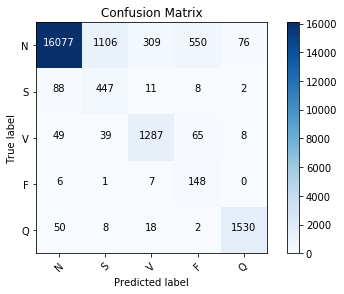

In [38]:
plot_confusion_matrix(cm=cm,classes=['N', 'S', 'V', 'F', 'Q'], title = "Confusion Matrix")

In [52]:
predC = model.predict_classes(testX.iloc[[7]],verbose =0)
print(predC)

[0]


In [46]:
testY

,187
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
21887,4.0
21888,4.0
21889,4.0
21890,4.0


In [78]:
trainX = asarray(trainX).reshape(asarray(trainX).shape[0],asarray(trainX).shape[1],1)
trainY.shape

(25000, 1)

In [25]:
# from keras.layers import LSTM
# model = Sequential()
# model.add(LSTM(100, activation = relu,input_shape = (186,1)))
# model.add(Dropout(.5))
# model.add(Dense(5, activation = softmax))
# model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

# model.fit(trainX,trainY, epochs = 3, batch_size = 200)